In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


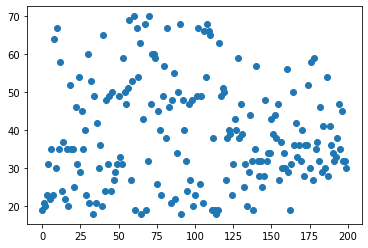

In [ ]:
#univariate
plt.scatter(df.index,df['Age'])
plt.show()

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

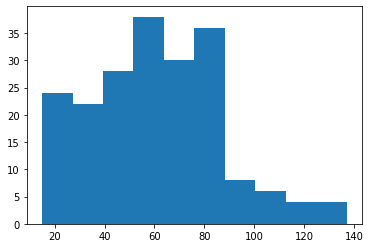

In [ ]:
plt.hist(df['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4704691610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f47046990d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f47046910d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4704699b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f47046a2110>],
 'means': []}

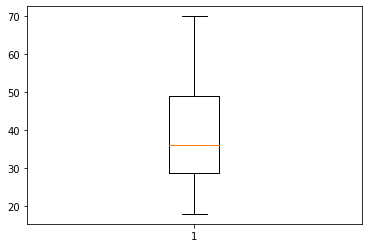

In [ ]:
plt.boxplot(df['Age'])

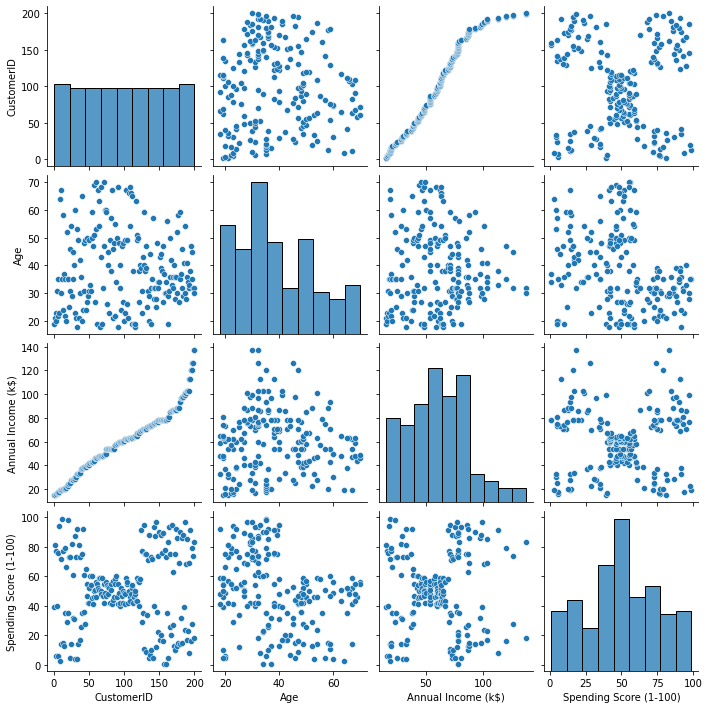

In [ ]:
#multivariate
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


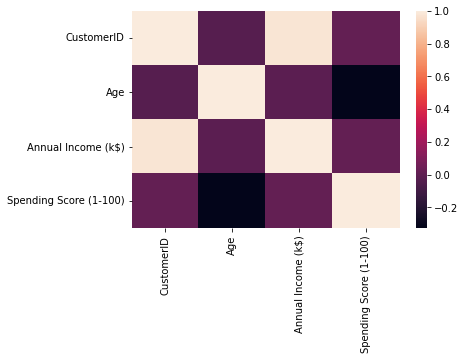

In [ ]:
sns.heatmap(df.corr())

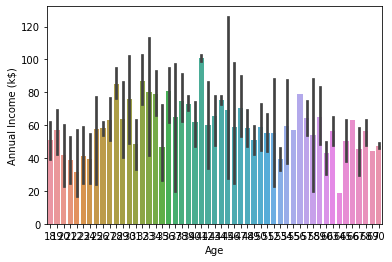

In [ ]:
#Bivariate analysis
sns.barplot(x='Age',y='Annual Income (k$)',data = df)

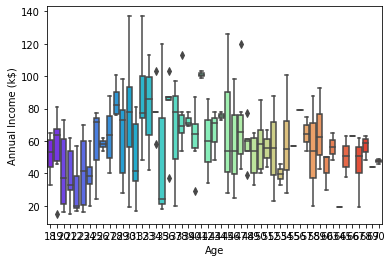

In [ ]:
sns.boxplot(x="Age", y="Annual Income (k$)", data=df,palette='rainbow')

In [ ]:
#descriptive analysis
df['Age'].mean()

38.85

In [ ]:
df['Age'].median()

36.0

In [ ]:
df['Age'].mode()

0    32
dtype: int64

In [ ]:
df['Age'].std()

13.96900733155888

In [ ]:
df['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [ ]:
#Missing values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

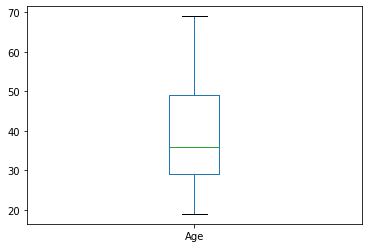

In [ ]:
#Outlier detection
q_low = df["Age"].quantile(0.01)
q_hi  = df["Age"].quantile(0.99)

df_filtered = df[(df["Age"] < q_hi) & (df["Age"] > q_low)]
df_filtered.boxplot(column=['Age'],grid=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Categorical values - encoding
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
df['Gender']

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [ ]:
scaler = MinMaxScaler().fit(X) #It makes an object of the MinMaxScaler and then we fit it on our variable X. 
print(scaler)

MinMaxScaler()


In [ ]:
scaler.feature_range

(0, 1)

In [ ]:
scaler.transform(X) 

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

In [ ]:
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X) #Finds the Kmeans to our data
    wcss.append(kmeans.inertia_) #This gives us the wcss values for each clusters

<function matplotlib.pyplot.show(*args, **kw)>

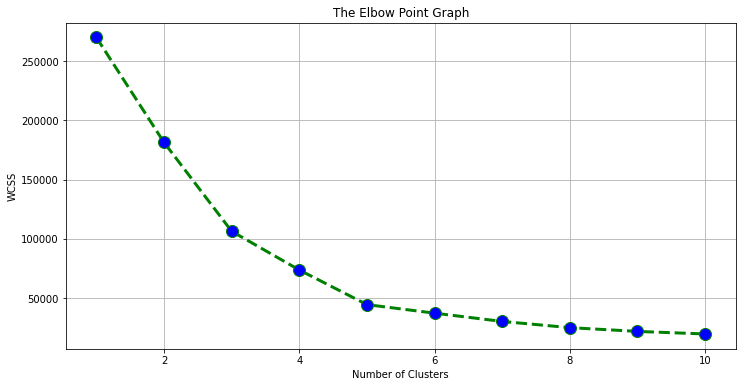

In [ ]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++') #initialize the class object
label= kmeans.fit_predict(X) #returns a cluster number for each of the data points
print(label)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 3 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 0 2 3 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [ ]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


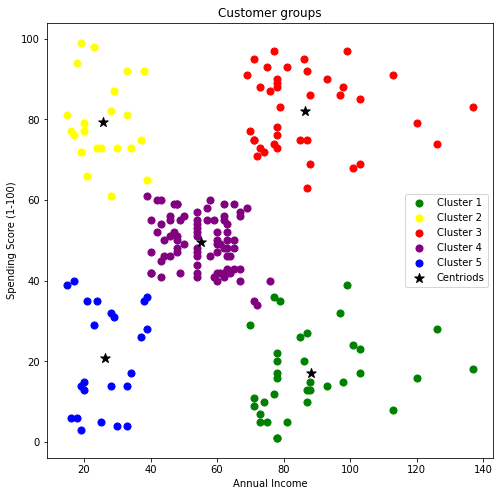

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[label == 0,0], X[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[label == 1,0], X[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[label == 2,0], X[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[label == 3,0], X[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[label == 4,0], X[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show() 

In [ ]:
Cluster 1 (green): These are average income earners with average spending scores. They are cautious with their spending at the store.

Cluster 2 (yellow): The customers in this group are high income earners and with high spending scores. They bring in profit. Discounts and other offers targeted at this group will increase their spending score and maximize profit.

Cluster 3 (red): This group of customers have a higher income but they do not spend more at the store. One of the assumption could be that they are not satisfied with the services rendered at the store. They are another ideal group to be targeted by the marketing team because they have the potential to bring in increased profit for the store.

Cluster 4 (purple): Low income earners with low spending score. I can assume that this is so because people with low income will tend to purchase less item at the store.

Cluster 5 (blue): These are low income earning customers with high spending scores. I can assume that why this group of customers spend more at the retail store despite earning less is because they enjoy and are satisfied with the services rendered at the retail store.